<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Machine-Learning/blob/main/Mathematical_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook will serve as an basic introduction on *linear algebra, calculus, complex-numbers* and *intermediate level Python*. 


If you want a deep dive onto any of the above mentioned topics, you can check my other work here 

1. [Course on Numerical Linear Algebra : Basics to Advanced](https://github.com/MonitSharma/Numerical-Linear-Algebra)

2. [Python for Physics](https://github.com/MonitSharma/Computational-Methods-in-Physics/tree/main/Code%20tutorial%20in%20Jupyter)


3. [Computational Methods in Physics](https://github.com/MonitSharma/Computational-Methods-in-Physics/tree/main)


Where you can learn to create visualizations like these:

![](https://user-images.githubusercontent.com/31341364/146273401-9a893a1d-75e6-4bcf-ad0c-5c643b64598e.gif)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)


# Complex Numbers

Using **Complex Numbers** in Machine Learning is rare, but in Quantum Mechanics, all spaces uses complex numbers. 

Complex numbers $\iota = \sqrt{-1}$ are very much an algebraic construct: they are [algebraically closed](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra) , whereas the real numbers aren't.


---

The imaginary number $\iota$ in Python is denoted by `1j`. 

In [4]:
if(1j**2==-1):
  print("Complex Number")
else:
  print("Not a Complex Number")

Complex Number


A Generic Complex number has both the real part and the imaginary part

In [5]:
x = 3.5 + 2.1j
print("Type of x:" , type(x))
print("Real part of x:", x.real)
print("Imaginary part of x:", x.imag)

Type of x: <class 'complex'>
Real part of x: 3.5
Imaginary part of x: 2.1


You can think of a complex number as a point on the plane. After all, it is described by two real numbers: the actual real part, and the real coefficient that multiplies the imaginary number. We define a simple function to plot complex numbers:

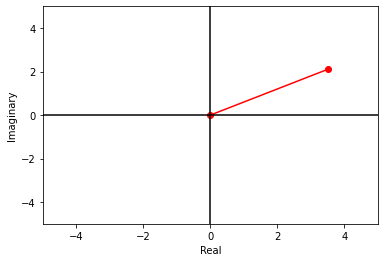

In [6]:
def plot_complex(a):
    for x in range(len(a)):
        plt.plot([0,a[x].real], [0,a[x].imag], 'r-o')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    limit = np.max(np.ceil(np.absolute(a)))
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))    
    plt.show()

plot_complex([x])

The absolute value of a complex numbers is the distance between the point and the origin

In [7]:
abs(x)

4.08166632639171

In fact, the absolute value $r$
 and the angle $\varphi$
 with the x axis are also sufficient to describe a complex number. This leads to writing the complex number as $z=re^{i\varphi}$
. In quantum mechanics, we often write complex numbers in the exponential form and call the angle $\varphi$
 a phase.

In [8]:
r = abs(x)
φ = np.arctan2(x.imag, x.real)
z = r*np.exp(1j*φ)
z == x

True

Complex conjugation flips the sign of the imaginary number, that is, $x=a+bi$
 becomes $x^*=a-bi$

(3.5-2.1j)


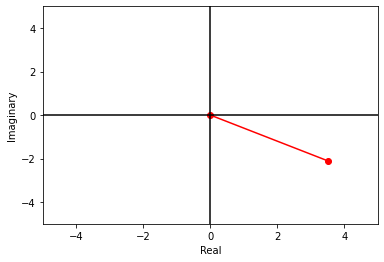

In [9]:
print(x.conjugate())
plot_complex([x.conjugate()])

# Vectors
Linear spaces are ubiquitous in machine learning, and they also provide the foundation to the formalism of quantum mechanics. However, unlike in machine learning and many other disciplines where linear space are common, the vectors are over complex spaces. Here is an example of a two-dimensional complex vector, that is, an element of $\mathbb{C}^2$


In [10]:
a = np.array([[1+2j], [2+2j]])
a

array([[1.+2.j],
       [2.+2.j]])

By convention, we write vectors as column vectors.

-----


Since a complex number is described by two real numbers, even a two dimensional complex number would require four spatial dimensions if we wanted to plot it. Visual intuition is very limited when we deal even with low-dimensional complex spaces.


-----


We can transpose complex vectors just like real vectors, but it is more interesting to take their conjugate transpose (also called Hermitian transpose or adjoint), which is a transposition followed by taking the complex conjugate of each element. We will denote the complex conjugation of a vector by $\dagger$ . With this, a vector $a=\begin{pmatrix}a_1\\ a_2\end{pmatrix}$ becomes $ a^\dagger=\begin{pmatrix}a_1^* & a_2^*\end{pmatrix}$

In [11]:
a.T.conj()

array([[1.-2.j, 2.-2.j]])

The product of a row vector with a column vector is a scalar, which we call the inner or dot product. In `numpy`, you can use the `.dot` method of an array, or the symbol `@` to calculate the inner product.

In [12]:
b = np.array([[0.1], [2j]])
b.T.conj() @ a

array([[4.1-3.8j]])

It is the inner product that allows us to talk about notions like angle between the vectors, orthogonality, and overlap. For instance, orthogonal vectors have zero overlap:

In [13]:
c = np.array([[1], [0]])
d = np.array([[0], [1]])
c.T.conj() @ d

array([[0]])

The inner product also induces a norm: taking the inner product of the vector with its own conjugate transpose measures its own overlap with itself. In other words, it has something to do with its length. The $l_2$
-norm is just the square root of the inner product of the vector with itself:

In [14]:
print("The square of the l2 norm of a:", np.linalg.norm(a)**2)
print("The same thing calculated as an inner product:", a.T.conj() @ a)

The square of the l2 norm of a: 12.999999999999998
The same thing calculated as an inner product: [[13.+0.j]]


Apart from the $l_2$
-norm, the $l_0$- and $l_1$-norms are also frequently used. The 
$l_0$-norm counts the number of nonzero elements of a vector. For instance, by imposing a regularizer on a neural network that adds a penalty in the 
$l_0$-norm of the weights, we increase sparsity in the network by forcing many entries to zero.

In [15]:
sum(a != 0), sum(c != 0)

(array([2]), array([1]))

The $l_1$-norm is the sum of the absolute values of the elements of the vector:

In [16]:
np.linalg.norm(a, ord=1)

5.06449510224598

If you are coming from a computer science background, tensor products might take while to get used to. We only work in finite-dimensional spaces, so the tensor product for us is identical to the Kronecker product. For two two-dimensional vectors $a=\begin{pmatrix}a_1\\ a_2\end{pmatrix}$ and $b=\begin{pmatrix}b_1\\ b_2\end{pmatrix}$ it is defined as $a\otimes b=\begin{pmatrix}a_1b_1\\a_1b_2\\a_2b_1\\ a_2b_2\end{pmatrix}$

In [17]:
np.kron(c, d)

array([[0],
       [1],
       [0],
       [0]])

# Matrices

Matrices, just like vectors, form linear spaces. The matrices we encounter in quantum computing are complex-valued, just like the vectors. For instance:

In [18]:
A = np.array([[1+2j, 2], [1j, 3+4j]])
A

array([[1.+2.j, 2.+0.j],
       [0.+1.j, 3.+4.j]])

The conjugate transpose works just the same way as for vectors:

In [19]:
A.T.conj()

array([[1.-2.j, 0.-1.j],
       [2.-0.j, 3.-4.j]])

We can apply a matrix to a vector:

In [20]:
A @ a

array([[ 1. +8.j],
       [-4.+15.j]])

We can also construct matrices by vectors. We saw that the inner product is the multiplication of a row vector with a column vector. If we multiply a column vector with a row vector, we get a matrix:

In [21]:
a @ a.T.conj()

array([[5.+0.j, 6.+2.j],
       [6.-2.j, 8.+0.j]])

The eigendecomposition of a matrix gives you its eigenvalues 
 and the corresponding eigenvectors:

In [22]:
λs, eigenvectors = np.linalg.eig(A)

The eigenvalues of the matrix are also called its spectrum. The spectrum is of central interest in quantum mechanics. For instance, the spectrum of a specific matrix called Hamiltonian gives you the discrete energy levels that the quantum system can take.


-----


Matrices often have some interesting properties. For instance, they can be symmetric, that is, they equal their transpose. Since we work with complex-valued matrices, we are interested in generalizing this to the complex conjugate. If a matrix equals its complex conjugate, it is called Hermitian (or self-adjoint). Hermitian matrices are ubiquitous in quantum mechanics: the Hamiltonian we just referred to is Hermitian, so are density matrices that represent quantum states, and measurements we make on the system. All of these concepts will be introduced in the course. Our example matrix is not Hermitian:

In [23]:
np.all(A == A.T.conj())

False

But the one we obtained from the vector $a$
 is:

In [24]:
B = a @ a.T.conj()
np.all(B == B.T.conj())

True